In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler ,RobustScaler
from sklearn.preprocessing import LabelEncoder


Read the dataset

In [ ]:
bank_data = pd.read_csv( r'C:\Users\jasmi\Downloads\ML Classes\MiniProject\bank-full.csv')
bank_data.head()
bank_data_set2=bank_data.copy()
bank_data.head()



0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

EDA

In [5]:
bank_data.info()
#bank_data['job'].unique()
#bank_data['marital'].unique()
#bank_data['education'].unique() 
#bank_data['default'].unique()
#bank_data['housing'].unique()
#bank_data['loan'].unique()
#bank_data['contact'].unique()
#bank_data['month'].unique()
#bank_data['poutcome'].unique()
#bank_data['y'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
bank_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [6]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- default			has credit in default?		no
- balance	average yearly balance	euros	no
- housing			has housing loan?		no
- loan		has personal loan?		no
- contact		contact communication type (categorical: 'cellular','telephone')		yes
- day_of_week			last contact day of the week
- month			last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')		no
- duration		last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.		no
- campaign		number of contacts performed during this campaign and for this client (numeric, includes last contact)		no
- pdays		number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)		yes
- previous		number of contacts performed before this campaign and for this client		no
- poutcome		outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')		yes
- y			has the client subscribed a term deposit?		no


Checking Outliers

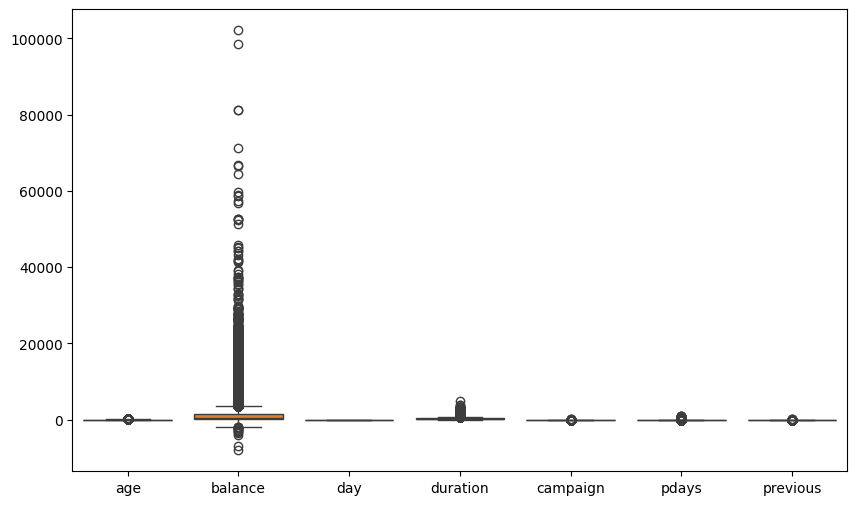

In [7]:
#There is no null values in the dataset.
# Now we have to check for outliers in the dataset.
# We can use boxplot to check for outliers in the dataset.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=bank_data)
plt.show()


seeing ouliers in "balance" column heavily.But its a financial data so we cant remove the outliers.we cannot able to consider banking data without outliers.So keeping this it might be a true behaviour


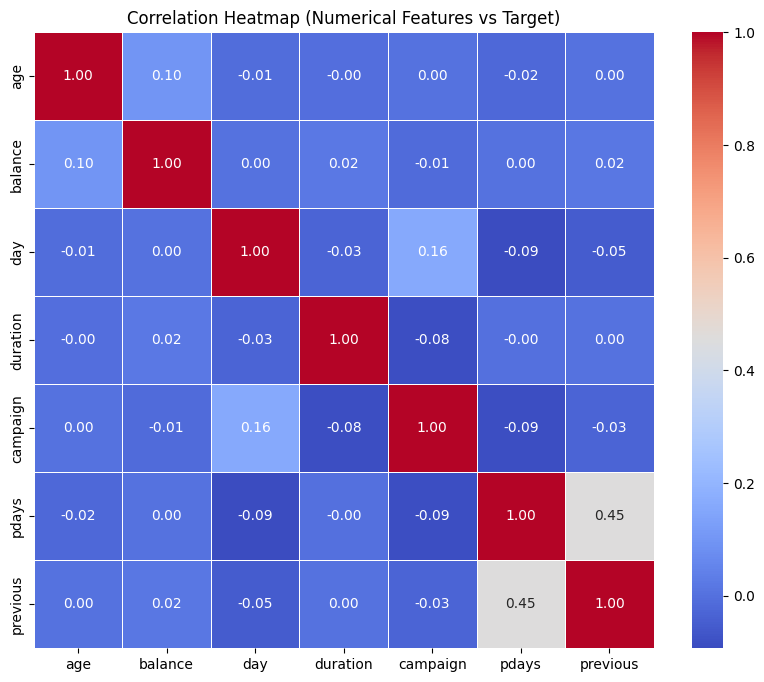

In [23]:
num_cols_corr = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Compute correlation matrix
corr_matrix = bank_data[num_cols_corr].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation Heatmap (Numerical Features vs Target)")
plt.show()

Duration column is not important for our model as that column is normally filling after the call made byth support team

Encoding and Scaling


From the research done,identified Onehot encoding is the better ecoder as it wont give weightage blindly for a categorical value.But as part of testig for the time being using both label encoding and one hot encoding 

In [9]:
#Label Encoding

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays','duration', 'previous']
encoder=LabelEncoder()
for col in categorical_cols:
    bank_data[col]=encoder.fit_transform(bank_data[col])

bank_data.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no


In [10]:
#One Hot encoding
categorical_cols_OHE = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
bank_data_set2= pd.get_dummies(bank_data_set2, columns=categorical_cols_OHE, drop_first=True)
bank_data_set2.head()



,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,no,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,no,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True


Scaling

Scaling is mandatory for SVM like model,using Standardscaler .But scaling is not mandatory for XGBoost however,trying robustscaler for Xgboost. 

In [11]:
#Scaling the data
# After thorough research,came to know about robustscaler which is used to scale the data with outliers.And this is using the concent of median and IQR to scale the data.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
bank_data[['balance','duration','campaign','pdays','previous']] = scaler.fit_transform(bank_data[['balance','duration','campaign','pdays','previous']])
bank_data.head()

#standardScaler
from sklearn.preprocessing import StandardScaler
scaler_Standard = StandardScaler()
bank_data_set2[['balance','duration','campaign','pdays','previous']] = scaler_Standard.fit_transform(bank_data_set2[['balance','duration','campaign','pdays','previous']])




In [ ]:
#removing duration column
bank_data.drop('duration', axis=1, inplace=True)
bank_data_set2.drop('duration', axis=1, inplace=True)

bank_data['y'] = bank_data['y'].map({'no': 0, 'yes': 1})
bank_data_set2['y']=bank_data_set2['y'].map({'no': 0, 'yes': 1})

In [13]:
#splitting the data into X and y
X = bank_data.drop('y', axis=1)
y = bank_data['y']
X2 = bank_data_set2.drop('y', axis=1)
y2 = bank_data_set2['y']
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42,stratify=y) 
# ---------------- SMOTE: Balance Training Data ----------------
from imblearn.over_sampling import SMOTE

# Apply SMOTE ONLY on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X2_train_res,y2_train_res=smote.fit_resample(X2_train, y2_train)

print('Class distribution before SMOTE:')
print(y_train.value_counts())
print(y2_train.value_counts())

print('\nClass distribution after SMOTE:')
print(pd.Series(y_train_res).value_counts())
print(pd.Series(y2_train_res).value_counts())


Class distribution before SMOTE:
y
0    31937
1     4231
Name: count, dtype: int64
y
0    31937
1     4231
Name: count, dtype: int64

Class distribution after SMOTE:
y
0    31937
1    31937
Name: count, dtype: int64
y
0    31937
1    31937
Name: count, dtype: int64


In [14]:
#After a research,its found that for some models its better tp ue one-hot encoding for categorical data rather than robust or label encoding.
# Here I am firstly focusing on XGBoost model for prediction
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler ,RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
# neg = (y_train == 0).sum()
# pos = (y_train == 1).sum()

# scale_pos_weight = neg / pos
# scale_pos_weight

model = XGBClassifier( random_state=42, eval_metric='logloss')
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.8709499060046445
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7985
           1       0.44      0.40      0.42      1058

    accuracy                           0.87      9043
   macro avg       0.68      0.66      0.67      9043
weighted avg       0.87      0.87      0.87      9043



In [15]:

from sklearn.svm import SVC
modelsvc = SVC(kernel='rbf', probability=True, random_state=42)
modelsvc.fit(X2_train_res,y2_train_res)
y_pred = modelsvc.predict(X2_test)
accuracy = accuracy_score(y2_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8374433263297578
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7985
           1       0.34      0.40      0.37      1058

    accuracy                           0.84      9043
   macro avg       0.63      0.65      0.64      9043
weighted avg       0.85      0.84      0.84      9043



In [16]:
#model using randomforetstclassifier
from sklearn.ensemble import RandomForestClassifier 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
#--------------------------------------------------------------------------------------

Accuracy: 0.8679641711821299
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      7985
           1       0.43      0.38      0.40      1058

    accuracy                           0.87      9043
   macro avg       0.67      0.65      0.66      9043
weighted avg       0.86      0.87      0.86      9043



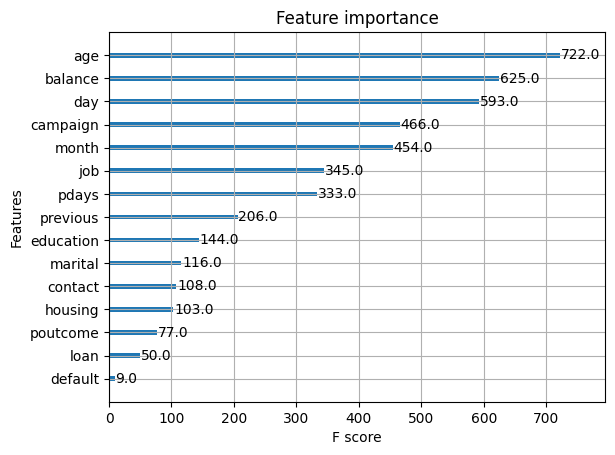

In [17]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model, max_num_features=15)
plt.show()

C:\Users\jasmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


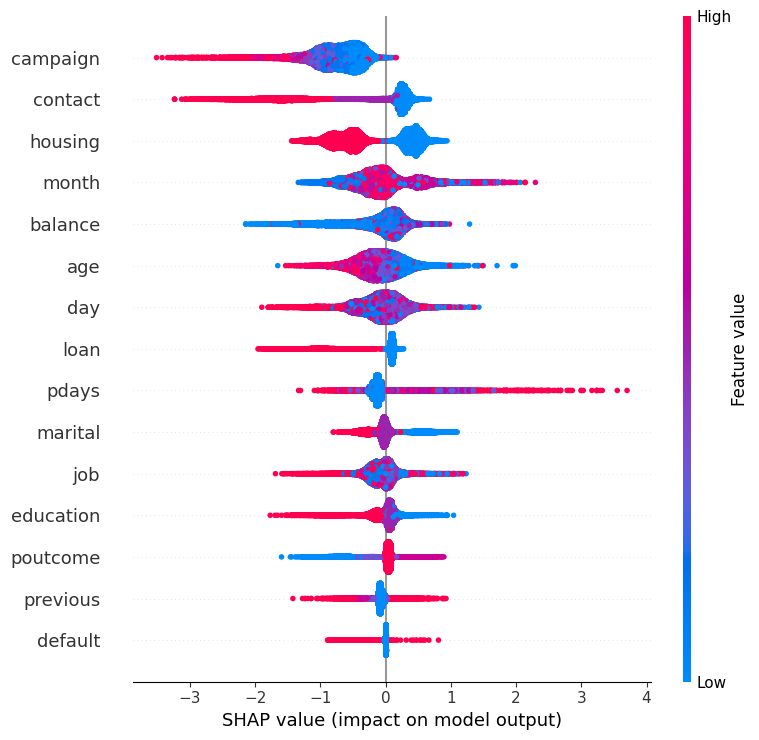

In [18]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)